In [2]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [3]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


# Detectors

Detectors allow you to get a signal given a condition. The condition can be :

- an absolute threshold or,
- a statistical threshold with a quantile.

Let's make an example.

## Generate a TimeSeries

This is only to have some data for the purpose of the example.

In [4]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [5]:
ts.head(3)

<TimeSeries (DataArray) (time: 3, component: 1, sample: 1)>
array([[[-0.00377122]],

       [[ 0.40349093]],

       [[ 2.47072711]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 2022-01-03
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

## Detection given an abolute threshold

With a single line of code, you can make your absolute detector.

In [6]:
td = on.detectors.threshold(low_threshold=-2)

Now, a detection on any TimeSeries can be made as follow : 

In [7]:
ats = td.detect(ts)

The return type of the detect function is a BinaryTimeSeries, meaning that it will always have values being 0 or 1.

In [8]:
type(ats)

ontime.core.time_series.binary_time_series.BinaryTimeSeries

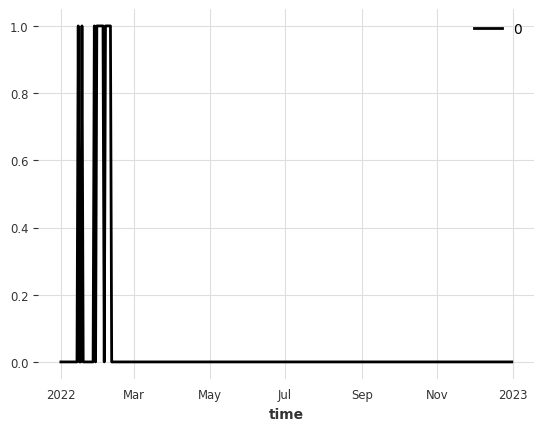

In [9]:
ats.plot();

## Detection given a statistical threshold (quantile)

Here the idea is similar but the threshold is dependant on the data. The quantile detector can be instanciated as follow

In [10]:
td = on.detectors.quantile(low_quantile=0.1)

And then, it can be fit

In [11]:
td.fit(ts)

Now, the usage is similar to the threshold detector.

In [12]:
ats = td.detect(ts)

The TimeSeries is also a BinaryTimeSeries with values being 0 or 1.

In [13]:
type(ats)

ontime.core.time_series.binary_time_series.BinaryTimeSeries

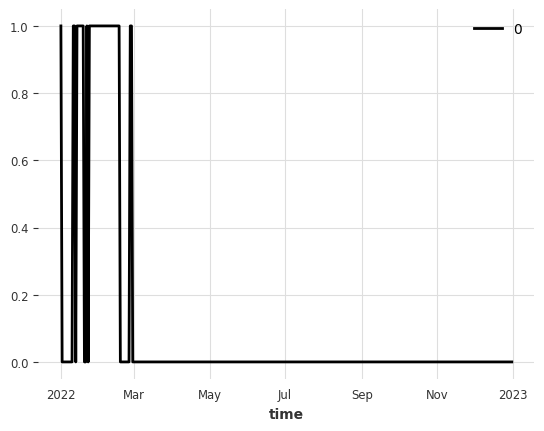

In [14]:
ats.plot();

## Activate a logger when anomalies are detected

Upon request, a logger can be activated and produces a dataframe where detected anomalies are recorded. As an example, let's take the last detection code and add a logger to a new quantile detection.

In [26]:
td = on.detectors.quantile(low_quantile=0.1, enable_logging=True)
td.fit(ts)

Detect

In [27]:
ats = td.detect(ts)

Index(['time', '0'], dtype='object', name='component')


Check what is in the logger

In [28]:
td.logger.log

,Timestamp,Description,Value
0,2022-01-01,QuantileDetector,True
1,2022-01-02,QuantileDetector,False
2,2022-01-03,QuantileDetector,False
3,2022-01-04,QuantileDetector,False
4,2022-01-05,QuantileDetector,False
...,...,...,...
360,2022-12-27,QuantileDetector,False
361,2022-12-28,QuantileDetector,False
362,2022-12-29,QuantileDetector,False
363,2022-12-30,QuantileDetector,False
